# Domae Line 2 M01 Laser marking
3-Feb-2020

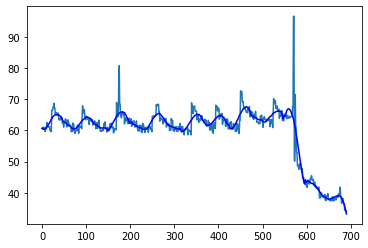

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

#data = read_csv('Insight Data 20200128_132638.csv')
#print(data.head())
#data.plot()
#pyplot.show()

data = pd.read_csv('Insight Data 20200128_132638_data_train.csv')
#data.head()
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data) 
# select two columns 
df[['DateTime', 'Value']] 
x = df['DateTime'] 
y = df['Value']
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3
pyplot.plot(y)
pyplot.plot(yhat, color='blue')
pyplot.show()
#df.plot()
#pyplot.legend(loc='upper left')
#pyplot.show()

In [41]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [77]:
def split_seq(seq, num_pieces):
    # https://stackoverflow.com/questions/54915803/automatically-split-data-in-list-and-order-list-elements-and-send-to-function
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
        
def pearson(s1, s2):
    """take two pd.Series objects and return a pearson corrleation"""
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

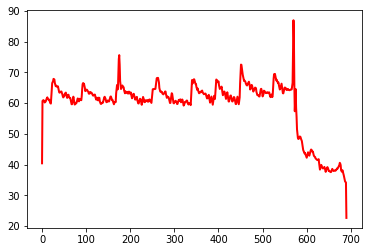

In [49]:
#pyplot.plot(y,'o')
pyplot.plot(smooth(y,3), 'r-', lw=2)
#pyplot.plot(smooth(y,19), 'g-', lw=2)

In [50]:
values = pd.DataFrame(y.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.952264
t+1  0.952264  1.000000


In [64]:
#dataframe.plot()

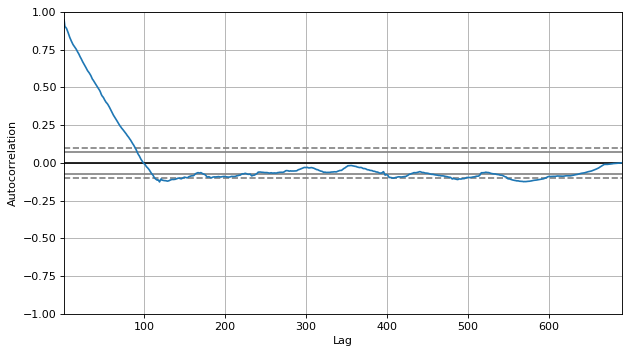

In [76]:
#Autocorrelation Function
from pandas.plotting import autocorrelation_plot
# Draw Plot
#pyplot.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':80})
autocorrelation_plot(y)
pyplot.show()

In [69]:
#from statsmodels.graphics.tsaplots import plot_acf
#y.plot()
#plot_acf(y)             #autocorrelation
#plot_pacf(y, lags=10)   #partial autocorrelation
#pyplot.show()

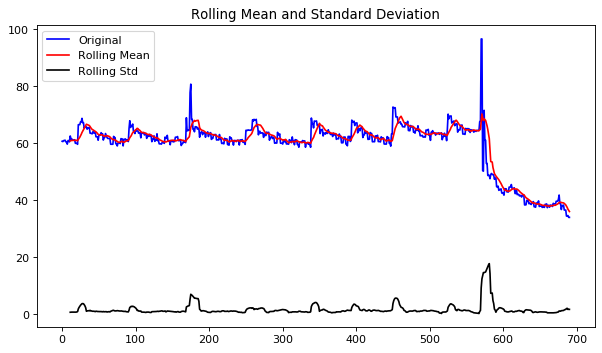

Results of Triger to Machine Stop
Test Statistics                 -0.785178
p-value                          0.823437
No. of lags used                 4.000000
Number of observations used    686.000000
critical value (1%)             -3.439918
critical value (5%)             -2.865762
critical value (10%)            -2.569019
dtype: float64


In [104]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    pyplot.plot(timeseries, color='blue',label='Original')
    pyplot.plot(rolmean, color='red', label='Rolling Mean')
    pyplot.plot(rolstd, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean and Standard Deviation')
    pyplot.show(block=False)
    
    #perform dickey fuller test  
    print("Results of Triger to Machine Stop")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    return rolstd

y_out = test_stationarity(y)

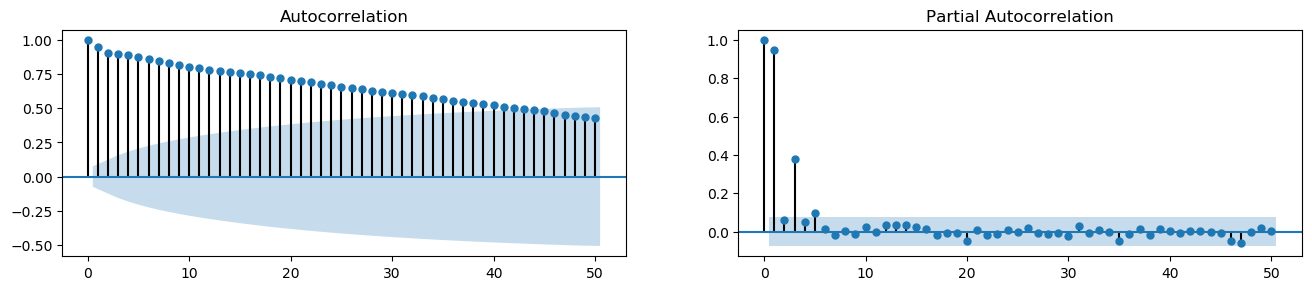

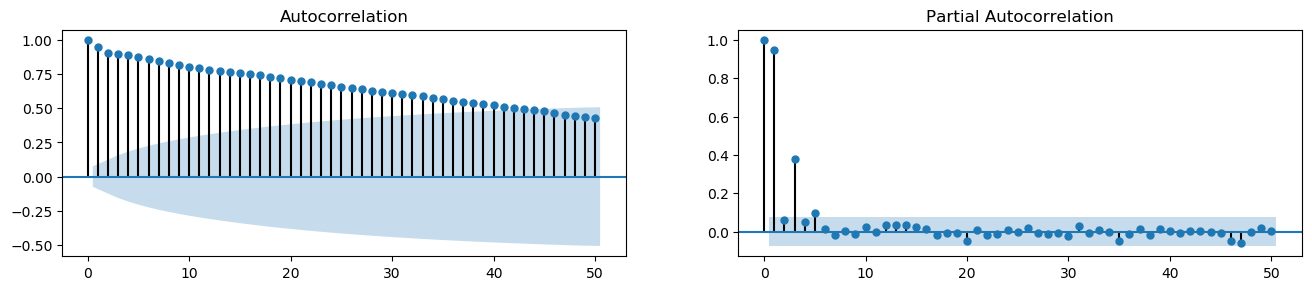

In [108]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = pyplot.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(y, lags=50, ax=axes[0])
plot_pacf(y, lags=50, ax=axes[1])

Text(0, 0.5, 'Frequency')

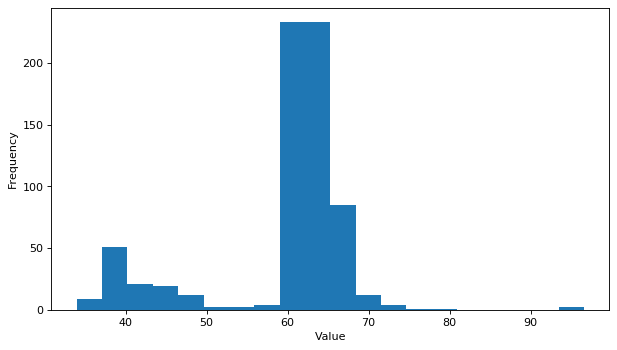

In [91]:
#pyplot.hist(df["Value"],bins=20)
pyplot.hist(y,bins=20)
pyplot.xlabel("Value")
pyplot.ylabel("Frequency")

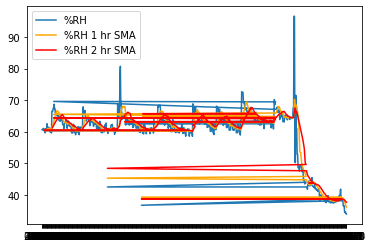

In [7]:
rolling_mean = df.Value.rolling(window=12).mean()
rolling_mean2 = df.Value.rolling(window=24).mean()
pyplot.plot(df.DateTime, df.Value, label='%RH')
pyplot.plot(df.DateTime, rolling_mean, label='%RH 1 hr SMA', color='orange')
pyplot.plot(df.DateTime, rolling_mean2, label='%RH 2 hr SMA', color='red')
pyplot.legend(loc='upper left')
pyplot.show()

In [8]:
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [9]:
def linear_weight_moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period, len(signal)):
        buffer.append(
            (signal[i - period : i] * (np.arange(period) + 1)).sum()
            / (np.arange(period) + 1).sum()
        )
    return buffer

In [10]:
def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [11]:
def detect(signal, treshold = 2.0):
    detected = []
    for i in range(len(signal)):
        if np.abs(signal[i]) > treshold:
            detected.append(i)
    return detected

In [12]:
outliers = detect(df.Value)

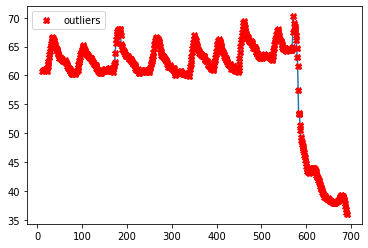

In [13]:
#pyplot.figure(figsize=(15, 7))
pyplot.plot(np.arange(len(rolling_mean)), rolling_mean)
pyplot.plot(np.arange(len(rolling_mean)), rolling_mean, 'X', label='outliers',markevery=outliers, c='r')
pyplot.legend()
pyplot.show()

In [14]:
from scipy.signal import find_peaks


ModuleNotFoundError: No module named 'backend'